In [1]:
# Install scikit-learn if not already installed
#Import libraries
import pandas as pd #For data manipulation and analysis
import os #For file and directory manipulation
import numpy as np #For numerical operations
import matplotlib.pyplot as plt #For data visualization
import seaborn as sns #For statistical data visualization
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder #For data preprocessing

In [2]:
# Define the file path
filepath = 'test.csv'  # Replace with the actual path to your CSV file

# Load the CSV file into a DataFrame
df_Test = pd.read_csv(filepath)

# Define the file path
filepath2 = 'train.csv'  # Replace with the actual path to your CSV file

# Load the CSV file into a DataFrame
df_Test2 = pd.read_csv(filepath)


In [3]:
df_Test['dataset_name'] = 'test'
df_Test2['dataset_name'] = 'train'
# Concatenate the two DataFrames
df = pd.concat([df_Test, df_Test2], ignore_index=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,dataset_name
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,test
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,test
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,test


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            734 non-null    object 
 1   Gender             712 non-null    object 
 2   Married            734 non-null    object 
 3   Dependents         714 non-null    object 
 4   Education          734 non-null    object 
 5   Self_Employed      688 non-null    object 
 6   ApplicantIncome    734 non-null    int64  
 7   CoapplicantIncome  734 non-null    int64  
 8   LoanAmount         724 non-null    float64
 9   Loan_Amount_Term   722 non-null    float64
 10  Credit_History     676 non-null    float64
 11  Property_Area      734 non-null    object 
 12  dataset_name       734 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 74.7+ KB


 Checking & Removing Duplicates

In [5]:
#Dropping Duplicates on the original dataframe
df=df.drop_duplicates()
print (f"Results from checking & removing duplicates:{df.shape}") 

Results from checking & removing duplicates:(734, 13)


In [6]:
# Counting all missing values
print(df.isnull().sum())

Loan_ID               0
Gender               22
Married               0
Dependents           20
Education             0
Self_Employed        46
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           10
Loan_Amount_Term     12
Credit_History       58
Property_Area         0
dataset_name          0
dtype: int64


Method 1 : Dropping Missing Values 

In [7]:
# Drop rows with missing values
df_dropped = df.dropna()

# Verify if all missing values are removed
print(df_dropped.isnull().sum())

# Display the shape of the DataFrame after dropping missing values
print(f"Dataset shape after dropping missing values: {df_dropped.shape}")


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dataset_name         0
dtype: int64
Dataset shape after dropping missing values: (578, 13)


In [8]:
# Check dataset update after dropping missing values in the dataset
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 733
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            578 non-null    object 
 1   Gender             578 non-null    object 
 2   Married            578 non-null    object 
 3   Dependents         578 non-null    object 
 4   Education          578 non-null    object 
 5   Self_Employed      578 non-null    object 
 6   ApplicantIncome    578 non-null    int64  
 7   CoapplicantIncome  578 non-null    int64  
 8   LoanAmount         578 non-null    float64
 9   Loan_Amount_Term   578 non-null    float64
 10  Credit_History     578 non-null    float64
 11  Property_Area      578 non-null    object 
 12  dataset_name       578 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 63.2+ KB


Method 2 Imputing Missing Values 

In [9]:
#Check the Original DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            734 non-null    object 
 1   Gender             712 non-null    object 
 2   Married            734 non-null    object 
 3   Dependents         714 non-null    object 
 4   Education          734 non-null    object 
 5   Self_Employed      688 non-null    object 
 6   ApplicantIncome    734 non-null    int64  
 7   CoapplicantIncome  734 non-null    int64  
 8   LoanAmount         724 non-null    float64
 9   Loan_Amount_Term   722 non-null    float64
 10  Credit_History     676 non-null    float64
 11  Property_Area      734 non-null    object 
 12  dataset_name       734 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 74.7+ KB


In [10]:
df_imputed = df.copy()  # Create a copy of the original DataFrame for imputation

In [11]:

# Impute missing values in the 'Gender' column with 'Male'
df_imputed['Gender'].fillna('Male', inplace=True)

# Impute missing values in the 'Dependents' column with '0'
df_imputed['Dependents'].fillna('0', inplace=True)

# Impute missing values in the 'Self_Employed' column with 'No'
df_imputed['Self_Employed'].fillna('No', inplace=True)

# Impute missing values in the 'LoanAmount' column with its average
df_imputed['LoanAmount'].fillna(df_imputed['LoanAmount'].mean(), inplace=True)

# Impute missing values in the 'Loan_Amount_Term' column with its average
df_imputed['Loan_Amount_Term'].fillna(df_imputed['Loan_Amount_Term'].mean(), inplace=True)

# Impute missing values in the 'Credit_History' column with '1'
df_imputed['Credit_History'].fillna(1, inplace=True)



C:\Users\Bruce Mphekgwane\AppData\Local\Temp\ipykernel_8468\3410900125.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['Gender'].fillna('Male', inplace=True)
C:\Users\Bruce Mphekgwane\AppData\Local\Temp\ipykernel_8468\3410900125.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [12]:
# Original DataFrame
print("Missing values in the original DataFrame:")
print(df.isnull().sum())

# Imputed DataFrame
print("\nMissing values after imputation:")
print(df_imputed.isnull().sum())

Missing values in the original DataFrame:
Loan_ID               0
Gender               22
Married               0
Dependents           20
Education             0
Self_Employed        46
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           10
Loan_Amount_Term     12
Credit_History       58
Property_Area         0
dataset_name          0
dtype: int64

Missing values after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dataset_name         0
dtype: int64


Method 3 Feature Engineering

In [13]:
# Explore the most frequent values for each column
columns_to_explore = [ 'Gender', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in columns_to_explore:
    if df[col].dtype == 'object':  # For categorical columns
        print(f"Most frequent value in '{col}': {df[col].mode()[0]}")
    else:  # For numerical columns
        print(f"Most frequent value in '{col}' (approx.): {df[col].value_counts().idxmax()}")

Most frequent value in 'Gender': Male
Most frequent value in 'Dependents': 0
Most frequent value in 'Self_Employed': No
Most frequent value in 'LoanAmount' (approx.): 150.0
Most frequent value in 'Loan_Amount_Term' (approx.): 360.0
Most frequent value in 'Credit_History' (approx.): 1.0


In [14]:
# Calculate the ratio of each gender in the DataFrame
gender_ratio = df['Gender'].value_counts(normalize=True)
print("Ratio of Gender:")
print(gender_ratio)

Ratio of Gender:
Gender
Male      0.803371
Female    0.196629
Name: proportion, dtype: float64


In [15]:
# Additional statistics for numerical columns
numerical_cols = ['LoanAmount', 'Loan_Amount_Term' , 'Credit_History']
print("\nSummary statistics for numerical columns:")
print(df[numerical_cols].describe())


Summary statistics for numerical columns:
       LoanAmount  Loan_Amount_Term  Credit_History
count  724.000000        722.000000      676.000000
mean   136.132597        342.537396        0.825444
std     61.324199         65.111443        0.379868
min     28.000000          6.000000        0.000000
25%    100.000000        360.000000        1.000000
50%    125.000000        360.000000        1.000000
75%    158.000000        360.000000        1.000000
max    550.000000        480.000000        1.000000


In [16]:
df_FeatureEngineering = df.copy()
df_FeatureEngineering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            734 non-null    object 
 1   Gender             712 non-null    object 
 2   Married            734 non-null    object 
 3   Dependents         714 non-null    object 
 4   Education          734 non-null    object 
 5   Self_Employed      688 non-null    object 
 6   ApplicantIncome    734 non-null    int64  
 7   CoapplicantIncome  734 non-null    int64  
 8   LoanAmount         724 non-null    float64
 9   Loan_Amount_Term   722 non-null    float64
 10  Credit_History     676 non-null    float64
 11  Property_Area      734 non-null    object 
 12  dataset_name       734 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 74.7+ KB


In [17]:
# Feature engineering for missing values

# For 'Gender', create a new category 'Other' for missing values
df_FeatureEngineering['Gender'] = df_FeatureEngineering['Gender'].fillna('Other')

# For 'Dependents', create a new category '-1' for missing values
df_FeatureEngineering['Dependents'] = df_FeatureEngineering['Dependents'].fillna('-1')

# For 'Self_Employed', create a new category 'Other' for missing values
df_FeatureEngineering['Self_Employed'] = df_FeatureEngineering['Self_Employed'].fillna('Other')

# For 'LoanAmount', assign 0 to missing values
df_FeatureEngineering['LoanAmount'] = df_FeatureEngineering['LoanAmount'].fillna(0)

# For 'Loan_Amount_Term', assign 0 to missing values
df_FeatureEngineering['Loan_Amount_Term'] = df_FeatureEngineering['Loan_Amount_Term'].fillna(0)

# For 'Credit_History', assign -1 to missing values
df_FeatureEngineering['Credit_History'] = df_FeatureEngineering['Credit_History'].fillna(-1)

In [18]:
# Verify if all missing values are handled
print(df_FeatureEngineering.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dataset_name         0
dtype: int64


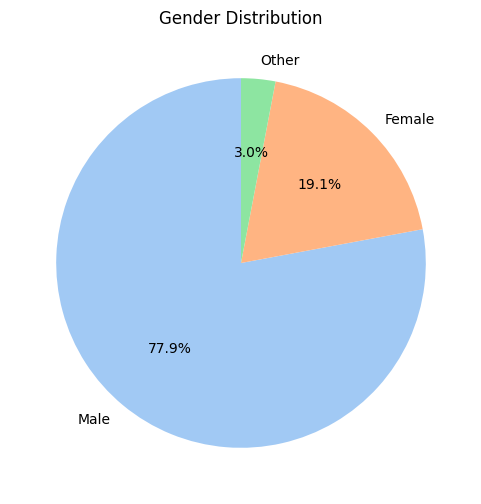

In [20]:
# Generate a pie chart of the Gender column
gender_counts = df_FeatureEngineering['Gender'].value_counts(dropna=False)
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')
plt.show()